$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Alg. Grovera - cz. 2: reprezentacja jednokubitowa </b></font>

Wykonanie algorytmu Grovera można symulować na okręgu jednostkowym.

W trakcie obliczeń amplitudy zaznaczonych (lub nieoznaczonych) elementów nigdy nie różnią się od siebie. Dlatego możemy pogrupować elementy jako oznaczone i nieoznaczone.

Ponieważ długość listy elementów (jako wektora) wynosi 1, możemy ją przedstawić jako wektor jednostkowy na okręgu jednostkowym, gdzie linia pionowa (oś $y$) reprezentuje zaznaczone elementy, a linia pozioma (oś $x$) reprezentuje nieoznaczone elementy.

Narysujemy przykładowy okrąg jednostkowy, używając poniższego kodu Python.

In [9]:

import matplotlib.pyplot as plt

# drawing used for math

def plot_2D_plane(right=5,up=5,left=-5,down=-5,fsize=(8,8)):
    hpoints, vpoints = [],[]
    for i in range(left,right+1):
        if i!=0: hpoints.append(i)
    for i in range(down,up+1):
        if i!=0: vpoints.append(i)
    
    ax = plt.figure(figsize=fsize).gca()

    # Set identical scales for both axes
    ax.set(xlim=(left-1,right+1), ylim=(down-1, up+1), aspect='equal')
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    # Create minor ticks placed at each integer to enable drawing of minor grid
    ax.set_xticks(hpoints)
    ax.set_yticks(vpoints)
    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
    # Create 'x' and 'y' labels placed at the end of the axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
    # Draw arrows
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (0), marker='<', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
    ax.plot((0), (0), marker='v', transform=ax.get_xaxis_transform(), **arrow_fmt)

def draw_sides(x=1,y=2,side_color="b",lwidth=1):
    plt.arrow(x,0,0,y,color=side_color,linestyle="dotted",width=0.001*lwidth)
    plt.arrow(0,y,x,0,color=side_color,linestyle="dotted",width=0.001*lwidth)
    
def draw_vector(x=1,y=2,vname="v",show_name=True,vcolor="b",sides=False,side_color="b",lwidth=1):
    plt.quiver(0,0,x,y,scale=1,scale_units='xy',angles = 'xy',color=vcolor,width=0.008*lwidth)
    dx = x
    if y<0: dy=y-0.3
    else: dy = y+0.3
        
    if show_name:
        vector_name="$"+vname+"=("+str(x)+","+str(y)+")$"
        plt.text(dx,dy,vector_name,color=vcolor)
    
    if sides:
        draw_sides(x,y,side_color)

def place_text(x,y,text,tcolor="blue"):
    plt.text(x,y,text,color=tcolor)

def show_plt():
    plt.show()
    
# drawing used for quantum
def draw_axes():
	points = [ [1.2,0], [0,1.2], [-1.2,0], [0,-1.2] ] # dummy points for zooming out
	arrows = [ [1.1,0], [0,1.1], [-1.1,0], [0,-1.1] ] # coordinates for the axes
	for p in points: 
		plt.plot(p[0],p[1]+0.1) # drawing dummy points
	for a in arrows: 
		plt.arrow(0,0,a[0],a[1],head_width=0.04, head_length=0.08) # drawing the axes


def draw_unit_circle():
    unit_circle= plt.Circle((0,0),1,color='black',fill=False)
    plt.gca().add_patch(unit_circle)
	
def draw_quantum_state(x,y,name):
	# shorten the line length to 0.92
	# line_length + head_length should be 1
	x1 = 0.92 * x
	y1 = 0.92 * y
	plt.arrow(0,0,x1,y1,head_width=0.04,head_length=0.08,color="blue")
	x2 = 1.15 * x
	y2 = 1.15 * y
	plt.text(x2,y2,name)
	
def draw_qubit():
	# draw a figure
	plt.figure(figsize=(6,6), dpi=60)
	# draw the origin
	plt.plot(0,0,'ro') # a point in red color
	# drawing the axes by using one of our predefined function
	draw_axes()
	# drawing the unit circle by using one of our predefined function
	draw_unit_circle()
	# drawing |0>
	plt.plot(1,0,"o")
	plt.text(1.05,0.05,"|0>")
	# drawing |1>
	plt.plot(0,1,"o")
	plt.text(0.05,1.05,"|1>")
	# drawing -|0>
	plt.plot(-1,0,"o")
	plt.text(-1.2,-0.1,"-|0>")
	# drawing -|1>
	plt.plot(0,-1,"o")
	plt.text(-0.2,-1.1,"-|1>")

def draw_qubit_grover():
	# draw a figure
	plt.figure(figsize=(7,7), dpi=60)
	# draw the origin
	plt.plot(0,0,'ro') # a point in red color
	# drawing the axes by using one of our predefined function
	draw_axes()
	# drawing the unit circle by using one of our predefined function
	draw_unit_circle()
	# drawing |0>
	plt.plot(1,0,"o")
	plt.text(1.05,0.05,"|nieoznaczone>")
	# drawing |1>
	plt.plot(0,1,"o")
	plt.text(0.05,1.05,"|oznaczone>")
	# drawing -|0>
	plt.plot(-1,0,"o")
	plt.text(-0.98,-0.09,"-|nieoznaczone>")
	# drawing -|1>
	plt.plot(0,-1,"o")
	plt.text(-0.4,-1.1,"-|oznaczone>")
    
    

def giant_oracle(circuit99,quantum_reg):
    number=18
    if(number%2 == 0):
        circuit99.x(quantum_reg[0])
    if(number%4 < 2):
        circuit99.x(quantum_reg[1])
    if(number%8 < 4):
        circuit99.x(quantum_reg[2])
    if(number%16 < 8):
        circuit99.x(quantum_reg[3])
    if(number%32 < 16):
        circuit99.x(quantum_reg[4])
    if(number%64 < 32):
        circuit99.x(quantum_reg[5])
    if(number%128 < 64):
        circuit99.x(quantum_reg[6])
    if(number%256 < 128):
        circuit99.x(quantum_reg[7])
    if(number%512 < 256):
        circuit99.x(quantum_reg[8])
    if(number < 512):
        circuit99.x(quantum_reg[9])
    
    circuit99.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[18])
    circuit99.ccx(quantum_reg[2],quantum_reg[3],quantum_reg[11])
    circuit99.ccx(quantum_reg[4],quantum_reg[5],quantum_reg[12])
    circuit99.ccx(quantum_reg[6],quantum_reg[7],quantum_reg[13])
    circuit99.ccx(quantum_reg[8],quantum_reg[9],quantum_reg[14])
    
    circuit99.ccx(quantum_reg[18],quantum_reg[11],quantum_reg[15])
    circuit99.ccx(quantum_reg[12],quantum_reg[13],quantum_reg[16])
    
    circuit99.ccx(quantum_reg[15],quantum_reg[16],quantum_reg[17])
    circuit99.ccx(quantum_reg[14],quantum_reg[17],quantum_reg[10])
    circuit99.ccx(quantum_reg[15],quantum_reg[16],quantum_reg[17])
    
    circuit99.ccx(quantum_reg[12],quantum_reg[13],quantum_reg[16])
    circuit99.ccx(quantum_reg[18],quantum_reg[11],quantum_reg[15])
    
    circuit99.ccx(quantum_reg[8],quantum_reg[9],quantum_reg[14])
    circuit99.ccx(quantum_reg[6],quantum_reg[7],quantum_reg[13])
    circuit99.ccx(quantum_reg[4],quantum_reg[5],quantum_reg[12])
    circuit99.ccx(quantum_reg[2],quantum_reg[3],quantum_reg[11])
    circuit99.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[18])
    
    if(number%2 == 0):
        circuit99.x(quantum_reg[0])
    if(number%4 < 2):
        circuit99.x(quantum_reg[1])
    if(number%8 < 4):
        circuit99.x(quantum_reg[2])
    if(number%16 < 8):
        circuit99.x(quantum_reg[3])
    if(number%32 < 16):
        circuit99.x(quantum_reg[4])
    if(number%64 < 32):
        circuit99.x(quantum_reg[5])
    if(number%128 < 64):
        circuit99.x(quantum_reg[6])
    if(number%256 < 128):
        circuit99.x(quantum_reg[7])
    if(number%512 < 256):
        circuit99.x(quantum_reg[8])
    if(number < 512):
        circuit99.x(quantum_reg[9])

def giant_oracle2(circuit99,quantum_reg):
    numbers=[12,45]
    for number in numbers:
        if(number%2 == 0):
            circuit99.x(quantum_reg[0])
        if(number%4 < 2):
            circuit99.x(quantum_reg[1])
        if(number%8 < 4):
            circuit99.x(quantum_reg[2])
        if(number%16 < 8):
            circuit99.x(quantum_reg[3])
        if(number%32 < 16):
            circuit99.x(quantum_reg[4])
        if(number%64 < 32):
            circuit99.x(quantum_reg[5])
        if(number%128 < 64):
            circuit99.x(quantum_reg[6])
        if(number%256 < 128):
            circuit99.x(quantum_reg[7])
        if(number%512 < 256):
            circuit99.x(quantum_reg[8])
        if(number < 512):
            circuit99.x(quantum_reg[9])

        circuit99.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[18])
        circuit99.ccx(quantum_reg[2],quantum_reg[3],quantum_reg[11])
        circuit99.ccx(quantum_reg[4],quantum_reg[5],quantum_reg[12])
        circuit99.ccx(quantum_reg[6],quantum_reg[7],quantum_reg[13])
        circuit99.ccx(quantum_reg[8],quantum_reg[9],quantum_reg[14])

        circuit99.ccx(quantum_reg[18],quantum_reg[11],quantum_reg[15])
        circuit99.ccx(quantum_reg[12],quantum_reg[13],quantum_reg[16])

        circuit99.ccx(quantum_reg[15],quantum_reg[16],quantum_reg[17])
        circuit99.ccx(quantum_reg[14],quantum_reg[17],quantum_reg[10])
        circuit99.ccx(quantum_reg[15],quantum_reg[16],quantum_reg[17])

        circuit99.ccx(quantum_reg[12],quantum_reg[13],quantum_reg[16])
        circuit99.ccx(quantum_reg[18],quantum_reg[11],quantum_reg[15])

        circuit99.ccx(quantum_reg[8],quantum_reg[9],quantum_reg[14])
        circuit99.ccx(quantum_reg[6],quantum_reg[7],quantum_reg[13])
        circuit99.ccx(quantum_reg[4],quantum_reg[5],quantum_reg[12])
        circuit99.ccx(quantum_reg[2],quantum_reg[3],quantum_reg[11])
        circuit99.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[18])

        if(number%2 == 0):
            circuit99.x(quantum_reg[0])
        if(number%4 < 2):
            circuit99.x(quantum_reg[1])
        if(number%8 < 4):
            circuit99.x(quantum_reg[2])
        if(number%16 < 8):
            circuit99.x(quantum_reg[3])
        if(number%32 < 16):
            circuit99.x(quantum_reg[4])
        if(number%64 < 32):
            circuit99.x(quantum_reg[5])
        if(number%128 < 64):
            circuit99.x(quantum_reg[6])
        if(number%256 < 128):
            circuit99.x(quantum_reg[7])
        if(number%512 < 256):
            circuit99.x(quantum_reg[8])
        if(number < 512):
            circuit99.x(quantum_reg[9])

def giant_diffusion(circuit99,quantum_reg):
    for i in range(10):
        circuit99.h(quantum_reg[i])
        circuit99.x(quantum_reg[i])

    circuit99.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[18])
    circuit99.ccx(quantum_reg[2],quantum_reg[3],quantum_reg[11])
    circuit99.ccx(quantum_reg[4],quantum_reg[5],quantum_reg[12])
    circuit99.ccx(quantum_reg[6],quantum_reg[7],quantum_reg[13])
    circuit99.ccx(quantum_reg[8],quantum_reg[9],quantum_reg[14])
    
    circuit99.ccx(quantum_reg[18],quantum_reg[11],quantum_reg[15])
    circuit99.ccx(quantum_reg[12],quantum_reg[13],quantum_reg[16])
    
    circuit99.ccx(quantum_reg[15],quantum_reg[16],quantum_reg[17])
    circuit99.ccx(quantum_reg[14],quantum_reg[17],quantum_reg[10])
    circuit99.ccx(quantum_reg[15],quantum_reg[16],quantum_reg[17])
    
    circuit99.ccx(quantum_reg[12],quantum_reg[13],quantum_reg[16])
    circuit99.ccx(quantum_reg[18],quantum_reg[11],quantum_reg[15])
    
    circuit99.ccx(quantum_reg[8],quantum_reg[9],quantum_reg[14])
    circuit99.ccx(quantum_reg[6],quantum_reg[7],quantum_reg[13])
    circuit99.ccx(quantum_reg[4],quantum_reg[5],quantum_reg[12])
    circuit99.ccx(quantum_reg[2],quantum_reg[3],quantum_reg[11])
    circuit99.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[18])

    for i in range(10):
        circuit99.x(quantum_reg[i])
        circuit99.h(quantum_reg[i])
    
    circuit99.x(quantum_reg[10])


def Uf(circuit,qreg):
	circuit.ccx(qreg[0],qreg[1],qreg[2])
	
def Uf_8(circuit,quantum_reg):
	circuit.x(quantum_reg[2])
	circuit.ccx(quantum_reg[2],quantum_reg[1],quantum_reg[4])
	circuit.ccx(quantum_reg[4],quantum_reg[0],quantum_reg[3])
	circuit.ccx(quantum_reg[2],quantum_reg[1],quantum_reg[4])
	circuit.x(quantum_reg[2])
	    

import random, math

# randomly create a 2-dimensional quantum state
def random_qstate_by_value():
    first_entry = random.randrange(-100,101)
    second_entry = random.randrange(-100,101)
    length_square = first_entry**2+second_entry**2
    while length_square == 0:
        first_entry = random.randrange(-100,101)
        second_entry = random.randrange(-100,101)
    length_square = first_entry**2+second_entry**2
    first_entry = first_entry / length_square**0.5
    second_entry = second_entry / length_square**0.5
    return [first_entry,second_entry]
	
# randomly create a 2-dimensional quantum state	
def random_qstate_by_angle(precision=1):
    sample_angle = 360 * (10**precision)
    angle_degree = random.randrange(sample_angle)
    angle_radian = 2 * math.pi * angle_degree / sample_angle
    return [math.cos(angle_radian),math.sin(angle_radian)]	
	
# finding the angle of a 2-dimensional quantum state
def angle_qstate(x,y):
    angle_radian = math.acos(x) # radian of the angle with state |0>
    angle_degree = 360*angle_radian/(2*math.pi) # degree of the angle with state |0>
	# if the second amplitude is negative, 
	#     then angle is (-angle_degree)
	#     or equivalently 360 + (-angle_degree)
    if y<0: angle_degree = 360-angle_degree # degree of the angle
	# else degree of the angle is the same as degree of the angle with state |0>
    return angle_degree	
    

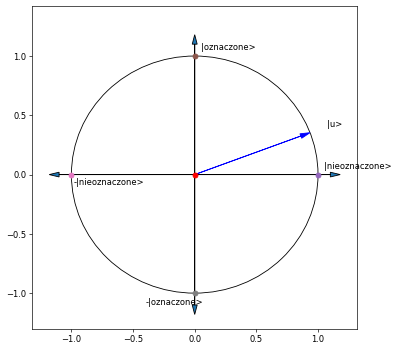

In [10]:
#import sys
#sys.path.insert(0, '../qworld/include/')

#from drawing import draw_axes, draw_unit_circle, draw_quantum_state, draw_qubit, draw_qubit_grover, show_plt

#from quantum_state import random_qstate_by_value, random_qstate_by_angle, angle_qstate

#from grover import giant_oracle, giant_oracle2, giant_diffusion, Uf, Uf_8

draw_qubit_grover()
draw_quantum_state((7/8)**0.5,(1/8)**0.5,"|u>")
show_plt()

### Przykład: N = 8 z 3 oznaczonymi elementami

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

Załóżmy, że zaznaczono trzeci, czwarty i siódmy element. Możemy użyć trzech kubitów i powiązać każdy element z jednym ze stanów bazowych:

$$ \myarray{|c|c|}{
\hline element & stan \\ \hline
1 & \ket{000} \\ \hline
2 & \ket{001} \\ \hline
\mathbf{3} & \mathbf{\ket{010}} \\ \hline
\mathbf{4} & \mathbf{\ket{011}} \\ \hline
5 & \ket{100} \\ \hline
6 & \ket{101} \\ \hline
\mathbf{7} & \mathbf{\ket{110}} \\ \hline
8 & \ket{111} \\ \hline
} $$

Algorytm Grovera rozpoczyna się w następującym stanie kwantowym:

$$ \ket{u} =  H\ket{0} \otimes H \ket{0} \otimes H \ket{0} = H^{\otimes 3} \ket{000} $$

$$ \ket{u} =  \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}  } \otimes
    \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}  } \otimes
    \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}  } $$

$$ \ket{u} = \frac{1}{2\sqrt{2}} \ket{000} +  \frac{1}{2\sqrt{2}} \ket{001} +  \frac{1}{2\sqrt{2}} \ket{010} +  \frac{1}{2\sqrt{2}} \ket{011} +  \frac{1}{2\sqrt{2}} \ket{100} +  \frac{1}{2\sqrt{2}} \ket{101} +  \frac{1}{2\sqrt{2}} \ket{110} +  \frac{1}{2\sqrt{2}} \ket{111}.  $$

Grupujemy je jako elementy nieoznaczone i oznaczone:

$$ \ket{u} = 
    \underbrace{ \frac{1}{2\sqrt{2}} \big( \ket{000} + \ket{001} + \ket{100} + \ket{101} + \ket{111} \big) }_{\ket{u_{x}}}  + 
    \underbrace{ \frac{1}{2\sqrt{2}}  \big(\mathbf{  \ket{010} + \ket{011} + \ket{110} } \big) }_{\ket{u_{y}}}
$$

lub jako wektory

$$ \ket{u} = \ket{u_{x}} + \ket{u_{y}} = 
     \frac{1}{2\sqrt{2}} \myvector{1 \\ 1 \\ 0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 1} 
    + \frac{1}{2\sqrt{2}}  \myvector{0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 0 \\ 1 \\ 0}   
$$

Jak możemy przedstawić ten stan na okręgu jednostkowym?

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

#### Ortogonalność $ \ket{u_{x}} $ i $ \ket{u_{y}} $

Stany kwantowe $ \ket{u_{x}} $ i $ \ket{u_{y}} $ są względem siebie ortogonalne / prostopadłe ($ \ket{u_{nieoznaczone}} \perp \ket{u_{oznaczone}} $), tj. iloczyn skalarny odpowiadających im wektorów daje 0. 

Na okręgu jednostkowym stany $ \ket{0} $ i $ \ket{1} $ są do siebie ortogonalne, więc możemy przedstawić $ \ket{u} = \ket{u_{x }} + \ket{u_{y}} $ na okręgu jednostkowym jako

$$ \ket{u} \rightarrow \alpha \ket{0} + \beta \ket{1} $$

lub zmieniając nazwy stanów podstawowych

$$ \ket{u} \rightarrow \alpha \ket{nieoznaczone} + \beta \ket{oznaczone}. $$

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

### Jak wyznaczyć amplitudy stanów $ \ket{0} $ i $ \ket{1} $ na podstawie amplitud elementów oznaczonych i nieoznaczonych?

Możemy przepisać $ \ket{u} $ w następujący sposób:

$$ \ket{u} = \ket{u_{x}} + \ket{u_{y}} = \frac{\sqrt{5}}{2\sqrt{2}} \myvector{\frac{1}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}  \\ 0 \\ 0 \\ \frac{1}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}  \\ 0 \\ \frac{1}{\sqrt{5}} } + \frac{\sqrt{3}}{2\sqrt{2}}  \myvector{0 \\ 0 \\ \frac{1}{\sqrt{3}}  \\ \frac{1}{\sqrt{3}}  \\ 0 \\ 0 \\ \frac{1}{\sqrt{3}}  \\ 0}
= \frac{\sqrt{5}}{2\sqrt{2}} \ket{nieoznaczone} + \frac{\sqrt{3}}{2\sqrt{2}} \ket{oznaczone},
$$

gdzie oba wektory, $ \ket{nieoznaczone} $ i $ \ket{oznaczone} $, są wektorami jednostkowymi i są do siebie prostopadłe.

Możemy zatem przedstawić $ \ket{u} $ na okręgu jednostkowym za pomocą następującej konwersji:

$$
    \ket{u} = \frac{\sqrt{5}}{2\sqrt{2}} \ket{nieoznaczone} + \frac{\sqrt{3}}{2\sqrt{2}} \ket{oznaczone} \xrightarrow{~~~~\mbox{okrąg jednostkowy}~~~~}.  
    \frac{\sqrt{5}}{2\sqrt{2}} \ket{0} + \frac{\sqrt{3}}{2\sqrt{2}} \ket{1}.
$$

Narysujemy uzyskany okrąg jednostkowy za pomocą poniższego kodu Python.

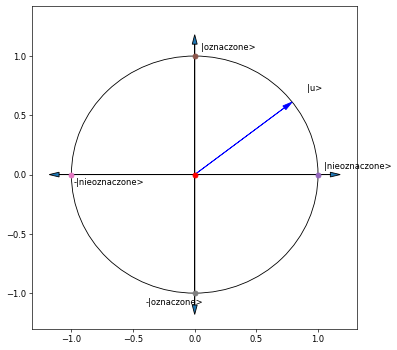

In [11]:
#run quantum.py
draw_qubit_grover()
draw_quantum_state((5/8)**0.5,(3/8)**0.5,"|u>")
show_plt()

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

#### Amplitudy $ \ket{oznaczone} $ i $ \ket{nieoznaczone} $ podczas obliczeń

Należy zauważyć, że po każdej fazie algorytmu Grovera wektory $ \ket{oznaczone} $ i $ \ket{nieoznaczone} $ nie ulegają zmianie.

Dowolny stan kwantowy podczas obliczeń algorytmu Grovera można przedstawić dla pewnego $ a, b $ jako

$$ \ket{u_j} = \ket{u_{j,x}} + \ket{u_{j,y}} = \myvector{ a \\ a  \\ 0 \\ 0 \\ a \\ a  \\ 0 \\ a } +  \myvector{0 \\ 0 \\b \\ b  \\ 0 \\ 0 \\ b  \\ 0} =
a \sqrt{5} \myvector{\frac{1}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}  \\ 0 \\ 0 \\ \frac{1}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}  \\ 0 \\ \frac{1}{\sqrt{5}} } + b \sqrt{3} \myvector{0 \\ 0 \\ \frac{1}{\sqrt{3}}  \\ \frac{1}{\sqrt{3}}  \\ 0 \\ 0 \\ \frac{1}{\sqrt{3}}  \\ 0} = a\sqrt{5} ~ \ket{nieoznaczone} + b\sqrt{3} ~ \ket{oznaczone}.
$$

Jako ogólna zasada:

Dla $ N $  elementów, z których oznaczonych jest $ k $, jeśli amplitudy elementów nieoznaczonych i oznaczonych wynoszą odpowiednio $ a $ i $ b $, wówczas stan kwantowy można przedstawić jako

$$ a\sqrt{N-k} ~ \ket{nieoznaczone} + b \sqrt{k} ~ \ket{oznaczone}. $$

## Wizualizacja algorytmu Grovera

W tej sekcji wykonujemy algorytm Grovera, korzystając ze zmodyfikowanej gry wyjaśnionej w części dot. inwersji względem średniej.

Możesz użyć funkcji *oracle* i *inversion* w Zadaniu 2 tego notebooka dot. inwersji względem średniej.

*Dla uproszczenia zakładamy, że pierwszy element jest zawsze zaznaczony, a ostatni zawsze nie jest zaznaczony.*

<h3> Zadanie 1 </h3>

Wykonaj algorytm wyszukiwania Grovera dla 5 kroków, gdzie $ N = 16 $ i zaznaczony jest pierwszy element.

Podczas wykonywania narysuj wszystkie stany kwantowe na okręgu jednostkowym.

Wypisz kąt każdego stanu w stopniach (użyj $\sin^{-1}$) i sprawdź, czy istnieje jakiś wzór dla operatorów wyroczni i inwersji?

Czy istnieje jakiś wzorzec dla każdego kroku algorytmu Grovera?

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

In [ ]:
import math
from matplotlib.pyplot import bar
from math import asin, pi

iterations = []
L = []

# initial values
iteration = 5
N = 16
marked_elements = [0]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

#
# Twój kod
#

for step in range(iteration):
    # store the iteration
    iterations.append(step+1)
    elements = query(elements, marked_elements)
    elements = inversion(elements)
    L.append(asin(elements[marked_elements[0]]))

bar(iterations,L)

draw_qubit_grover()
# draw_quantum_state(x,y,name)

<h3> Zadanie 2 </h3>

W Zadaniu 1, po jakim kroku prawdopodobieństwo zaobserwowania zaznaczonego elementu jest największe?

<h3> Zadanie 3 </h3>

Mamy listę rozmiaru $ N = 128 $. Powtarzamy algorytm Grovera przez 10 kroków.

Określ wizualnie (tj. zadania 1 i 2) odpowiednią liczbę iteracji, jeśli liczba zaznaczonych elementów wynosi 1, 2, 4 lub 8. (Stan kwantowy na okręgu jednostkowym powinien znajdować się blisko osi $y$. )

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

In [ ]:
from math import asin, pi

# initial values
iteration = 10
N = 128
marked_elements = [0]
#marked_elements = [0,1]
#marked_elements = [0,1,2,3]
#marked_elements = [0,1,2,3,4,5,6,7]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

#
# Twój kod
#

# draw_qubit_grover()
# draw_quantum_state(x,y,name)

<h3> Zadanie 4 </h3>

Mamy listę rozmiarów $ N = 256 $. Powtarzamy algorytm wyszukiwania Grovera w 20 (lub 10) krokach.

Określ wizualnie (tj. zadania 1 i 2) odpowiednią liczbę iteracji, jeśli liczba zaznaczonych elementów wynosi 1, 2, 4 lub 8. (stan kwantowy na okręgu jednostkowym powinien znajdować się blisko osi $Y$. )

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

In [ ]:
from math import asin, pi

# initial values
iteration = 20
N = 256
marked_elements = [0]
#marked_elements = [0,1]
#marked_elements = [0,1,2,3]
#marked_elements = [0,1,2,3,4,5,6,7]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

#
# Twój kod
#

# draw_qubit_grover()
# draw_quantum_state(x,y,name)

## Więcej o algorytmie Grovera

Idea algorytmu Grovera:
<ul>
     <li>amplitudy zaznaczonych (rzadziej występujących) elementów można szybko wzmocnić, </li>
     <li>w ten sposób prawdopodobieństwo zaobserwowania jednego z zaznaczonych elementów szybko zbliża się do 1.</li>
</ul>

W celu „szybkiego” wzmocnienia iteracyjnie stosujemy dwa odbicia do naszych stanów kwantowych.

Pierwsze odbicie to obrót w prawo, a drugie odbicie to obrót w lewo.

Drugie odbicie zawsze obraca się o $ 2 \theta $ stopni bardziej niż pierwsze odbicie, gdzie $ \theta $ jest kątem tego stanu początkowego na okręgu jednostkowym.

Dlatego po dwóch odbiciach stan kwantowy zostaje obrócony o $ 2 \theta $ w kierunku przeciwnym do ruchu wskazówek zegara.

### Przykładowe refleksje

Przyjrzyjmy się początkowej części Zadania 1 i narysujmy linie odbicia.

Załóżmy, że mamy 16 elementów i jeden z nich jest zaznaczony.

**Poniżej rysujemy pierwszą linię odbicia kolorem zielonym, a drugą linię odbicia kolorem żółtym.**

In [ ]:
%run quantum.py
import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
show_plt()

**Po zastosowaniu operatorów Hadamarda zaczynamy od następującego stanu.**

In [ ]:
%run quantum.py
import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state((15/16)**0.5,(1/16)**0.5,"$|u_0>$")
show_plt()

**Iteracja 1, po pierwszym odbiciu:**

In [ ]:
%run quantum.py
import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state((15/16)**0.5,(1/16)**0.5,"$|u_0>$")
draw_quantum_state((15/16)**0.5,-(1/16)**0.5,"$|u'_0>$")
show_plt()

**Iteracja 1, po drugim odbiciu:**

In [ ]:
%run quantum.py
import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state((15/16)**0.5,-(1/16)**0.5,"$|u'_0>$")
draw_quantum_state(0.7262,0.6875,"$|u_1>$")
show_plt()

**Iteracja 2, po pierwszym odbiciu:**

In [ ]:
%run quantum.py
import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state(0.7262,0.6875,"$|u_1>$")
draw_quantum_state(0.7262,-0.6875,"$|u'_1>$")
show_plt()

**Iteracja 2, po drugim odbiciu:**

In [ ]:
%run quantum.py
import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state(0.7262,-0.6875,"$|u'_1>$")
draw_quantum_state(0.3026,0.9531,"$|u_2>$")
show_plt()

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

### Kiedy przestać

Powtarzając algorytm Grovera, powinniśmy uważać, kiedy się zatrzymać.
<ul>
     <li> Po osiągnięciu wartości maksymalnej amplitudy zaczynają szybko spadać, a po osiągnięciu wartości minimalnej ponownie się wzmacniają i tak dalej.</li>
</ul>

Jako trywialny przykład rozważymy obrót na okręgu jednostkowym o kąt $ \frac{\pi}{8} $ rozpoczynający się w $ \ket{0} $.
<ul>
     <li> Po każdych 4 obrotach odwiedzamy stany $ \ket{1} $, $ -\ket{0} $, $ -\ket{1} $, ponownie $ \ket{0} $ i tak dalej. </li>
     <li> Zauważ, że prawdopodobieństwo zaobserwowania stanu $ \ket{1} $ oscyluje między 0 a 1 podczas obracania. </li>
</ul>

<h3> Liczba iteracji </h3>

Jeśli na liście o rozmiarze $ N $ znajduje się pojedynczy zaznaczony element, to  $ \pi \dfrac{\sqrt{N}}{4} $ iteracje mogą dać zaznaczony element z dużym prawdopodobieństwem.

Jeżeli oznaczonych jest $k$ elementów, to lepiej wykonać iterację $ \pi \dfrac{\sqrt{\frac{N}{k}}}{4} $ razy.

Jeśli $k$ jest nieznane, możemy wykonać algorytm w różnych iteracjach. Jednym ze sposobów osiągnięcia tego jest iteracja algorytmu
<br>
$ \pi \dfrac{\sqrt{\frac{N}{1}}}{4}, \pi \dfrac{\sqrt{\frac{N}{2}}}{4}, \pi \dfrac{ \sqrt{\frac{N}{4}}}{4}, \pi \dfrac{\sqrt{\frac{N}{8}}}{4}, \ldots $ razy.

Całkowita liczba iteracji nadal będzie proporcjonalna do $ \pi \dfrac{\sqrt{N}}{4} $: $ O \Big( \pi \dfrac{\sqrt{N}}{4} \Big) $ .

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

### Matematyczne wyprowadzenie odbicia przez inwersję (opcjonalnie)

Jest oczywiste, że operatory zapytań odzwierciedlają stan kwantowy na okręgu jednostkowym na osi $ X $.

Z drugiej strony operator inwersji odzwierciedla stan kwantowy na okręgu jednostkowym po linii określonej przez stan początkowy, powiedzmy $ \ket{u} $. Fakt ten nie jest taki oczywisty i poniżej przedstawiamy jak go wyprowadzić. ($ \bra{u} $ jest sprzężoną transpozycją wektora $ \ket{u} $.)

Początkowy stan kwantowy to $ \ket{u} = \myvector{\frac{1}{\sqrt{N}} \\ \vdots \\ \frac{1}{\sqrt{N}}}$ i inwersja jest operatorem liniowym i jest reprezentowany przez macierz:

$$ D = 2 \mymatrix{ccc}{
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     \vdots & \ddots & \vdots \\
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     }
- I . $$

Ponieważ $ \ket{u} \bra{u} = \mymatrix{ccc}{
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     \vdots & \ddots & \vdots \\
     \frac{1}{N} & \cdots & \frac{1}{N} \\
     } $, możemy przedstawić $ D $ w postaci $ \ket{u} $ jako $ D = 2 \ket{u} \bra{u} - I$.
    
Niech naszym obecnym stanem kwantowym będzie $a \ket{u} + b \ket{u^\perp}$, gdzie $\ket{u^\perp}$ oznacza stan, który jest ortogonalny (prostopadły) do $\ket {u}$. Po zastosowaniu $D$ do naszego obecnego stanu kwantowego otrzymujemy

$$D \big(a \ket{u} + b \ket{u^\perp}\big) = \big(2 \ket{u} \bra{u} - I \big) \big(a \ ket{u} + b \ket{u^\perp} \big) = a \big(2 \ket{u} \bra{u} \ket{u} - \ket{u} \big) + b \ big(2 \ket{u} \bra{u} \ket{u^\perp} - \ket{u^\perp} \big). $$

Aby uprościć to równanie, używamy następujących dwóch faktów:
<ul>
     <li>$\bra{u} \ket{u} = 1$, ponieważ iloczyn wewnętrzny stanu kwantowego daje jego długość do kwadratu, która jest równa 1;</li>
     <li>$\bra{u} \ket{u^\perp} = 0$, ponieważ stany są względem siebie ortogonalne.</li>
</ul>

$$ a \big( 2 \ket{u} \bra{u} \ket{u} - \ket{u} \big) + b \big( 2 \ket{u} \bra{u} \ket{ u^\perp} - \ket{u^\perp} \big) = a \big( 2 \ket{u} - \ket{u} \big) + b \big( 2 \ket{u} \cdot 0 - \ket{u^\perp} \big) = a \ket{u} - b \ket{u^\perp}. $$

Ponieważ $D (a \ket{u} + b \ket{u^\perp}) = a \ket{u} - b \ket{u^\perp}$, wnioskujemy, że $D$ jest odbiciem oś utworzona przez stan $\ket{u}$.